<a href="https://colab.research.google.com/github/jhonatanparada499/supervised-learning-notes/blob/main/recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# Import image processing library 2026-02-10
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 2. 1. 0. 0. 0.]
 [0. 2. 2. 3. 5. 2. 3. 1.]
 [0. 2. 1. 0. 3. 3. 6. 4.]
 [0. 2. 1. 0. 1. 2. 0. 1.]
 [0. 2. 2. 0. 1. 1. 0. 0.]
 [0. 1. 4. 1. 2. 1. 0. 0.]
 [0. 0. 2. 3. 1. 0. 0. 0.]]


Text(0.5, 1.0, 'Grayscale')

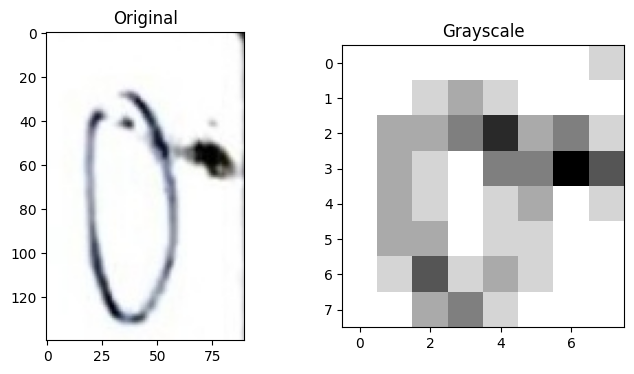

In [33]:
IMG_PATH = "Zero_full (1).jpg"
img = imread(IMG_PATH)
gray_img = rgb2gray(img)
resized_img = resize(gray_img, (8, 8), anti_aliasing=True)

# Scaling values inside the img array
resized_img = resized_img / np.max(resized_img) # calcs pixel intensity relative to higher one in the img
resized_img = 16 - (resized_img * 16) # assigns pixels a value btw 0 - 16
resized_img = np.round(resized_img, 0) # 0 means the number of decimals

print(resized_img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(resized_img, cmap=plt.cm.gray_r) # gray_r means inverted gray
ax[1].set_title("Grayscale")

Digits Dataset

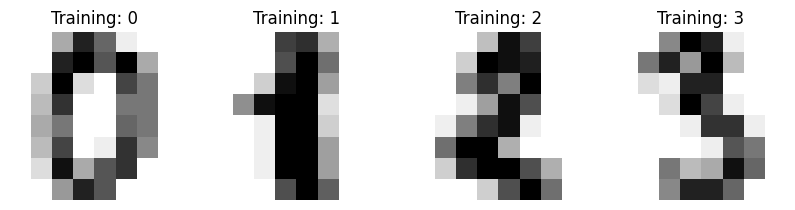

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Classification

In [30]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test[20:])

Prediction VS Actual values

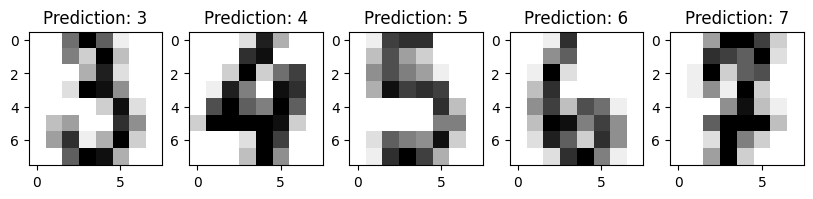

In [31]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test[20:], predicted):
    # ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Report

In [21]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


